# 1. Introduction

Imports

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("StudentsPerformance.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Logical Variable Creation

In [2]:
df["test prepartion course completed"] = 1*(df["test preparation course"] == "completed")

Renaming of Columns

In [3]:
df = df.rename(columns = {"parental level of education":"parental_education", "test preparation course": "test_prep", "math score": "math_score", "reading score":"reading_score", "writing score": "writing_score"})

In [4]:
df.head(5)

,gender,race/ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,test prepartion course completed
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,0


### Dataset Introduction

This dataset, pulled from Kaggle, contains information on 1,000 students and variables that may factor into their academic performance. Within the dataset there are 8 variables: the gender of the student, the race of the student (classified by groups), the education level of a parent, whether the student had standard or free lunch, whether the student engages in some form of test preparation, and the scores of the student in math, reading, and writing, out of 100. 

### Research Questions

Q1 (Linear):What is the relationship between the gender of the student and their math score on a test out of 100 after controlling lunch type, parental level of education, and the reading score out of 100 constant both in the sample and the underlying population? How does my model perform on new data? 

Q2 (Logistic): What are the odds that a student has prepared for a test given their math score, writing score, reading score, and parental level of education?

### Response Variables

Q1: Math Score out of 100 ("math_score")

Q2: Student Preparation for Test ("prep_completed")

### Contextual Importance

These questions provide insight into factors that may impact student achievement. For our linear regression model, examining whether gender plays a role in math scores for testing could help indicate whether there is a disparity somewhere in the learning process. For our logistic regression model, we can examine whether there is a relationship between the odds of being in test prep and getting higher scores in tests focused in math, writing, and reading, as well as if there is increased odds of being in test prep if parents have a higher level of education (completion of high school or higher).

# 2. Linear Regression Analytical Tasks

### Research Questions

1. What is the relationship between Gender and Math Score after controlling for Lunch Type. Parental Level of Education, and Reading Score out of 100, both in the sample and underlying population?

2. How does my model perform on new data?

### Training/Test Data Split

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.15, random_state = 101)

### Linear Regression Model Fitted to Training Set

In [7]:
import statsmodels.formula.api as smf

ols = smf.ols("math_score~lunch+parental_education+reading_score+gender", data = df_train)

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     538.1
Date:                Thu, 22 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:42:07   Log-Likelihood:                -2758.2
No. Observations:                 850   AIC:                             5534.
Df Residuals:                     841   BIC:                             5577.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -6.2021      1.252     -4.955      0.000      -8.659      -3.745
lunch[T.standard]                           4.5254      0.467      9.694      0.000       3.609       5.442
parental_education[T.bachelor's degree]    -0.2377      0.767     -0.310      0.757      -1.742       1.267
parental_education[T.high school]          -0.0174      0.678     -0.026      0.979      -1.349       1.314
parental_education[T.master's degree]      -0.1072      1.034     -0.104      0.917      -2.137       1.923
parental_education[T.some college]          0.6503      0.646      1.007      0.314      -0.617       1.918
parental_education[T.some high school]     -1.0020      0.682     -1.469      0.142      -2.341       0.337
gender[T.male]                             12.0699      0.444     27.180      0.000      11.198      12.942
reading_score                               0.9182      0.016     57.572      0.000       0.887       0.950
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.338
Skew:                          -0.028   Prob(JB):                        0.844
Kurtosis:                       3.080   Cond. No.                         475.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Equation

ŷ = -6.2021 + (4.5254)(lunch[T.Standard]) + (-0.2377)(parental_education[T.bachelor's degree]) + (-0.0174)(parental_education[T.high school]) + (-0.1072)(parental_education[T.master's degree]) + (0.6503)(parental_education[T.some college]) + (-1.0020)(parental_education[T.some high school]) + 0.9182(reading_score) + (12.0699)(gender[T.male])

### Slope Interpretation

The slope coefficient for gender tells us that on average, male students score 12.0699 points higher than female students, holding lunch type, parental level of education, and the reading score constant.

### 95% Confidence Interval for Slope

The 95% confidence interval for this slope coefficient is (11.198, 12.942). This means that we are 95% confident that the true slope for how much the predicted math score for a male differs from a female student falls in the range (11.198, 12.942) holding lunch type, parental level of education, and the reading score. This confidence interval does not include 0. This means we can conclude there is a linear relationship between gender and math score. The RMSE for the test data is 6.2768587. This tells us the average size of our error is 6.2768587 points.

### Check Conditions for Model

Fitted Vs. Residual Plot

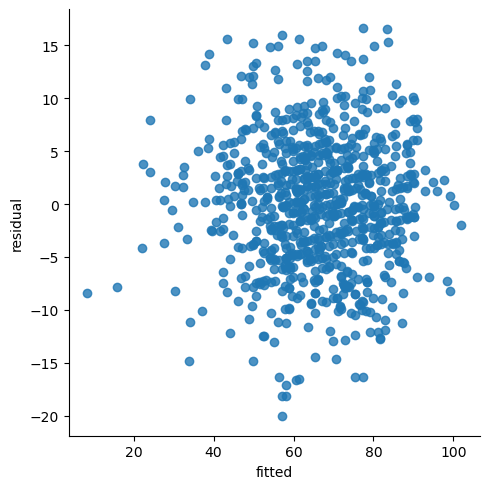

In [8]:
import matplotlib.pyplot as plt

df_train["fitted"] = results.predict(df_train)
df_train["residual"] = df_train['math_score'] - df_train["fitted"]
sns.lmplot(x = "fitted", y = "residual", data = df_train, fit_reg= False)

There are no obvious patterns around the summary, and the points seem to be centered around this line. This means that the linearity condition is met for this model. Also, since there are no obvious patterns of the points in this plot, the equal variance condition is met.

### QQ Plot

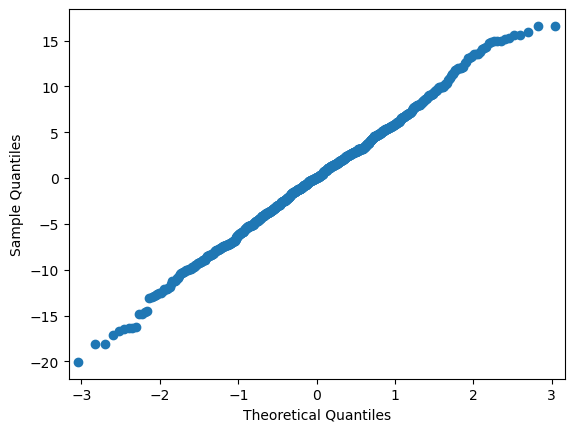

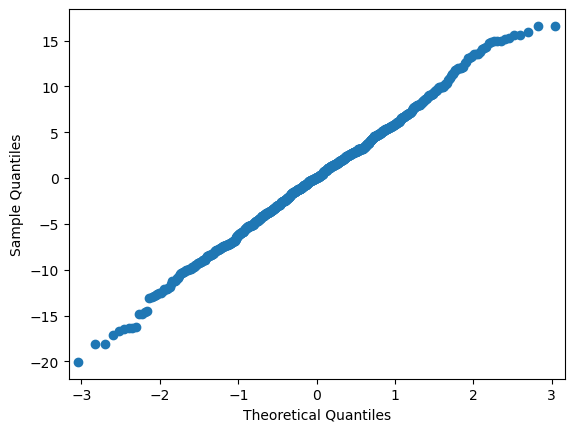

In [9]:
import statsmodels.api as sm

sm.qqplot(results.resid)

The QQ plot allows us to check for normality. As shown above, the points on the curve roughly fall along a straight line, meaning that the normality condition is met for this model.

### Multicollinearity

We only have one numeric predictor in our linear model, so we do not need to check for multicollinearity.

### Evaluate Model Performance

The proportion of variation in math score that is explained by its linear relationship with the x's in the model is 0.837. This value is fairly close to 1, which means that the majority of the variation in math score is explained.

### RMSE for Test Data

In [10]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(df_test['math_score'], results.predict(df_test))

6.2768587244190455

# 3. Logistic Regression Analytical Tasks

### Research Question

What are the odds that a student has prepared for a test given their math score, writing score, reading score, and parental level of education?

### Fitting a Logistic Regression Model to a Training Set

In [24]:
import statsmodels.formula.api as smf 

results = smf.logit(
    "'test preparation course completed'~math_score+writing_score+reading_score+parental_education",
    data=df_train
).fit()


PatsyError: Number of rows mismatch between data argument and 'test preparation course completed' (850 versus 1)
    'test preparation course completed'~math_score+writing_score+reading_score+parental_education
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^